In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("Data/Housing.csv")

In [3]:
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
X = data.loc[:, ["area", "bedrooms", "bathrooms"]].values
y = data.loc[:, "price"]
print(X.shape)
print(y.shape)

(545, 3)
(545,)


### House Prices Predict use Linear Regression Model

In [5]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
W = model.coef_
b = model.intercept_
print(f"Model coefficients: w = {W}, b = {b}")

Model coefficients: w = [3.78762754e+02 4.06820034e+05 1.38604950e+06], b = -173171.6076326333


### House Prices Predict use Gradient Descent
- Formula: 
$$
\hat{y} = w_1 \cdot x_1 + w_2 \cdot x_2 + \cdots + w_n \cdot x_n + b
$$
- Loss Function:
$$
L(w_1, w_2, \cdots, w_n, b) = \frac{1}{N} \sum_{i=1}^{N} \left((w_1 \cdot x^{(i)}_1 + w_2 \cdot x^{(i)}_2 + \cdots + w_n \cdot x^{(i)}_n + b) - y_i\right)^2 \tag{2}
$$
- Gradient:
$$
\frac{\partial L}{\partial w_j} = \frac{2}{N} \sum_{i=1}^{N} (\hat{y_i} - y_i) x^{(i)}_{j} \\
\frac{\partial L}{\partial b} = \frac{2}{N} \sum_{i=1}^{N} (\hat{y_i} - y_i)
$$

- Gradient Descent find $w_1, w_2, \cdot, w_n$ and b
$$
w_1 := w_1 - \alpha \cdot \frac{\partial L}{\partial w_1}
$$
$$
w_2 := w_2 - \alpha \frac{\partial L}{\partial w_2}
$$
$$
\vdots
$$
$$
w_n := w_n - \alpha \cdot \frac{\partial L}{\partial w_n}
$$
$$
b := b - \alpha \cdot \frac{\partial L}{\partial b}
$$

In [7]:
X_mean, X_std = np.mean(X, axis=0), np.std(X, axis=0) # X_mean: (3,), X_std: (3)
y_mean, y_std = np.mean(y, axis=0), np.std(y, axis=0)

X_scaled = (X - X_mean) / X_std # X_scaled: (545, 3)
y_scaled = (y - y_mean) / y_std # y_scaled: (545, 3)

In [8]:
def predict(X, W, b):
    return X @ W + b

In [9]:
def cost_function(X, y, W, b):
    N = len(X)
    errors = (predict(X, W, b) - y) ** 2
    
    return np.sum(errors) / N

In [10]:
def update(X, y, W, b, learning_rate):
    N = X.shape[0]

    y_pred = predict(X, W, b)
    errors = y_pred - y

    W_grad = X.T @ errors
    b_grad = np.sum(errors)

    W -= (1 / N) * learning_rate * W_grad
    b -= (1 / N) * learning_rate * b_grad
    
    return W, b

In [11]:
def train(X, y, W, b, learning_rate, epochs):
    costs = []

    for _ in range(epochs):
        W, b = update(X, y, W, b, learning_rate)
        costs.append(cost_function(X, y, W, b))
    
    return W, b, costs

In [12]:
W = np.zeros(X.shape[1], dtype=float) #[0.0, 0.0, 0.0]
b = 0.0
learning_rate = 0.01
epochs = 10000

W, b, costs = train(X_scaled, y_scaled, W, b, learning_rate, epochs)


In [13]:
W = y_std / X_std * W
b = y_mean + y_std * b - np.dot(W, X_mean)

In [14]:
print(f"Model coefficients: w = {W}, b = {b}")

Model coefficients: w = [3.78762754e+02 4.06820034e+05 1.38604950e+06], b = -173171.6076326426


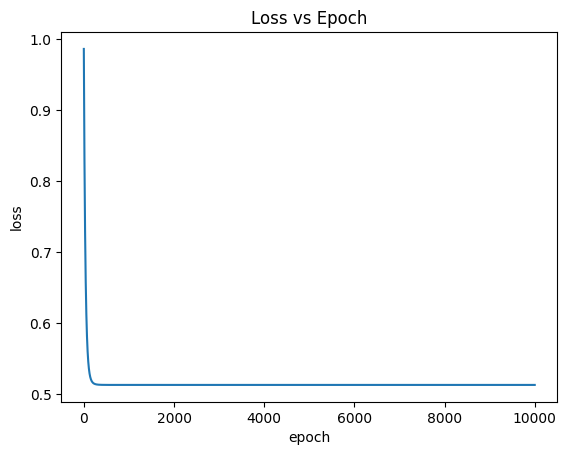

In [15]:
fig, ax = plt.subplots()

ax.plot(costs)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("Loss vs Epoch")
plt.show()

### Analytical Solution for Linear Regression
- Concept:
  + The Linear Regression model assumes:
  $$
  \hat{y} = w_1 \cdot x_1 + w_2 \cdot x_2 + \cdots + w_n \cdot x_n + b
  $$
  + Absorb b into the weight vector:
  $$
  \hat{y} = X \cdot \theta
  $$
  + with:
  $$
  \theta =
  \begin{bmatrix}
  b \\ w_1 \\ w_2 \\ \vdots \\ w_n
  \end{bmatrix}
  $$
  $$
  X =
  \begin{bmatrix}
  1 & x_{11} & x_{12} & \dots & x_{1n} \\
  1 & x_{21} & x_{22} & \dots & x_{2n} \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  1 & x_{m1} & x_{m2} & \dots & x_{mn}
  \end{bmatrix}
  $$
- Optimization Objective:
  + Loss Function: 
  $$
  J(\theta) = \frac{1}{N} \|X \cdot \theta - y\|^2
  $$\
- How to find the solution
  + Analytical solution (Normal Equation): 
  $$
  X^TX \theta = X^Ty
  $$
  if $X^{T}X$ is invertible: 
  $$
  \theta = (X^TX)^{-1}X^Ty
  $$
  + Non-invertible case
  Using the Moore-Penrose pseudoinverse: 
  $$
  \theta = X^+y
  $$
  with: 
  $$
  X^+ = (X^TX)^+X^T
  $$
  $$
  with "+" := {pseudo-inverse} (np.linalg.pinv)
  $$
- Gradient Descent
  Iterative update:
  $$
  \theta := \theta - \alpha \cdot \frac{2}{N} X^T(X\theta - y)
  $$

In [16]:
bias = np.ones((X.shape[0], 1))
X = np.hstack((bias, X))

In [17]:
def is_invertible(A, tol=None):
    A = np.asarray(A)
    if A.ndim != 2 or A.shape[0] != A.shape[1]:
        return False
    rank = np.linalg.matrix_rank(A, tol=tol)
    return rank == A.shape[0]

In [18]:


def solve(X, y):
    X_tran = X.transpose()
    return np.linalg.pinv(X_tran @ X) @ X_tran @ y

In [19]:
theta = solve(X, y)
b = theta[0]
W = np.delete(theta, 0)
print(f"Model coefficients: w = {W}, b = {b}")

Model coefficients: w = [3.78762754e+02 4.06820034e+05 1.38604950e+06], b = -173171.60755987963
